Exploring the minuteCaloriesNarrow_merged Dataset of our Project

In [2]:
import pandas as pd

filePath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv'
dfMinuteCalories = pd.read_csv(filePath)
# displaying the first few rows of our datset.
print(dfMinuteCalories.head())

           Id         ActivityMinute  Calories
0  1503960366  4/12/2016 12:00:00 AM    0.7865
1  1503960366  4/12/2016 12:01:00 AM    0.7865
2  1503960366  4/12/2016 12:02:00 AM    0.7865
3  1503960366  4/12/2016 12:03:00 AM    0.7865
4  1503960366  4/12/2016 12:04:00 AM    0.7865


In [3]:
# Displaying the basic information about the dataset
print(dfMinuteCalories.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB
None


In [4]:
# Displaying the summary statistics of numeric columns
print(dfMinuteCalories.describe())

                 Id      Calories
count  1.325580e+06  1.325580e+06
mean   4.847898e+09  1.623130e+00
std    2.422313e+09  1.410447e+00
min    1.503960e+09  0.000000e+00
25%    2.320127e+09  9.357000e-01
50%    4.445115e+09  1.217600e+00
75%    6.962181e+09  1.432700e+00
max    8.877689e+09  1.974995e+01


In [5]:
# Displaying the names of all columns
print(dfMinuteCalories.columns)

Index(['Id', 'ActivityMinute', 'Calories'], dtype='object')


Data Preprocessing

In [6]:
# Checking for missing values in each column
print(dfMinuteCalories.isnull().sum())

Id                0
ActivityMinute    0
Calories          0
dtype: int64


In [7]:
# Explore unique values in a specific columns
print(dfMinuteCalories['Id'].unique())
print(dfMinuteCalories['ActivityMinute'].unique())
print(dfMinuteCalories['Calories'].unique())


[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 8877689391]
['4/12/2016 12:00:00 AM' '4/12/2016 12:01:00 AM' '4/12/2016 12:02:00 AM'
 ... '5/12/2016 3:57:00 PM' '5/12/2016 3:58:00 PM' '5/12/2016 3:59:00 PM']
[0.78649998 0.94379997 2.04489994 ... 9.21348    9.69839954 4.9704299 ]


In [8]:
# Checking for duplicate rows
duplicates = dfMinuteCalories.duplicated()
print("Number of Duplicate Rows:", duplicates.sum())

duplicate_rows = dfMinuteCalories[duplicates]
print("\nAs No Duplicate Rows:")
print(duplicate_rows)

# Removing the Duplicate Rows
dfMinuteCalories = dfMinuteCalories.drop_duplicates()

# Verifying afterwards
print("\nNo Existing Duplicates:")
print("Total Number of Rows:", len(dfMinuteCalories))

Number of Duplicate Rows: 0

As No Duplicate Rows:
Empty DataFrame
Columns: [Id, ActivityMinute, Calories]
Index: []

No Existing Duplicates:
Total Number of Rows: 1325580


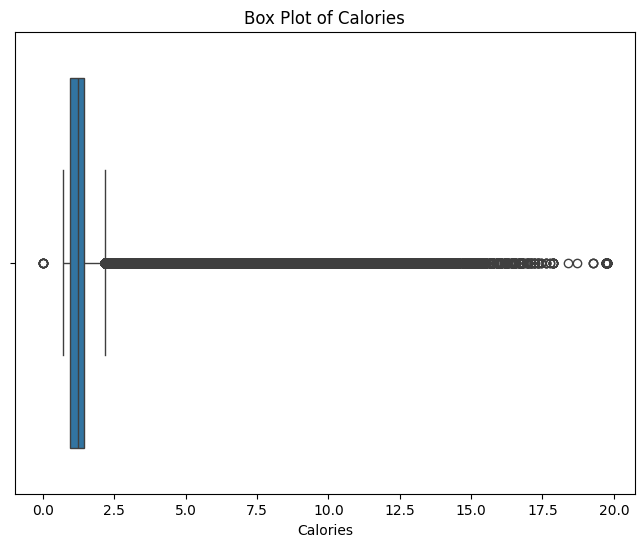

In [9]:
# Visualizing the outliers for the "Calories" column.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfMinuteCalories['Calories'])
plt.title('Box Plot of Calories')
plt.show()

Handling the Outliers Separately on Features

1. Calories

In [12]:
# Set the lower and upper limits for Calories capping
caloriesLowerLimit = 0.6
caloriesUpperLimit = 2.17

# Apply capping for Calories
dfMinuteCalories['Calories'] = dfMinuteCalories['Calories'].clip(lower=caloriesLowerLimit, upper=caloriesUpperLimit)

# Check the results
print("Capped Calories:")
print(dfMinuteCalories['Calories'].describe())


Capped Calories:
count    1.325580e+06
mean     1.314845e+00
std      4.385291e-01
min      6.000000e-01
25%      9.357000e-01
50%      1.217600e+00
75%      1.432700e+00
max      2.170000e+00
Name: Calories, dtype: float64


In [13]:
# Displaying summary statistics of all columns
print(dfMinuteCalories.describe())


                 Id      Calories
count  1.325580e+06  1.325580e+06
mean   4.847898e+09  1.314845e+00
std    2.422313e+09  4.385291e-01
min    1.503960e+09  6.000000e-01
25%    2.320127e+09  9.357000e-01
50%    4.445115e+09  1.217600e+00
75%    6.962181e+09  1.432700e+00
max    8.877689e+09  2.170000e+00


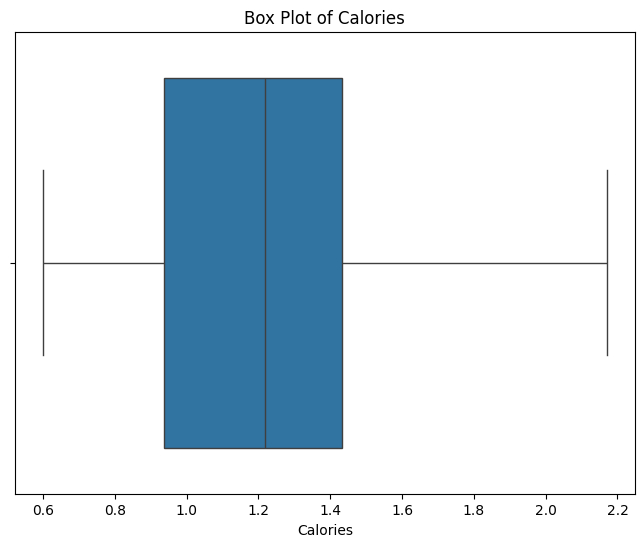

In [14]:
# Visualizing the outliers for the "Calories" column.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfMinuteCalories['Calories'])
plt.title('Box Plot of Calories')
plt.show()

In [15]:
# dfMinuteCalories is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteCaloriesNarrow_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
dfMinuteCalories.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteCaloriesNarrow_merged_Filtered.csv
